In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv("C:/Users/A NARESH KUMAR REDDY/Downloads/work.csv")

In [27]:
df.head()

,Date,soft drinks,Ice Creams,sandwiches,French Fries,pizza,Burger
0,2017-01,2815,3113,3523,4016,6922,4016
1,2017-02,2672,3006,3113,3957,3633,11331
2,2017-03,2755,4047,3006,4510,4292,7614
3,2017-04,2721,3523,4047,4276,4154,5048
4,2017-05,2946,3937,3523,4968,4121,9254


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          67 non-null     object
 1   soft drinks   67 non-null     int64 
 2   Ice Creams    67 non-null     int64 
 3   sandwiches    67 non-null     int64 
 4   French Fries  67 non-null     int64 
 5   pizza         67 non-null     int64 
 6   Burger        67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [29]:
df['Date']=pd.to_datetime(df['Date'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          67 non-null     datetime64[ns]
 1   soft drinks   67 non-null     int64         
 2   Ice Creams    67 non-null     int64         
 3   sandwiches    67 non-null     int64         
 4   French Fries  67 non-null     int64         
 5   pizza         67 non-null     int64         
 6   Burger        67 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 3.8 KB


In [31]:
a=pd.DataFrame(df[['Date','pizza']])

In [32]:
a.head()

,Date,pizza
0,2017-01-01,6922
1,2017-02-01,3633
2,2017-03-01,4292
3,2017-04-01,4154
4,2017-05-01,4121


In [33]:
a.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

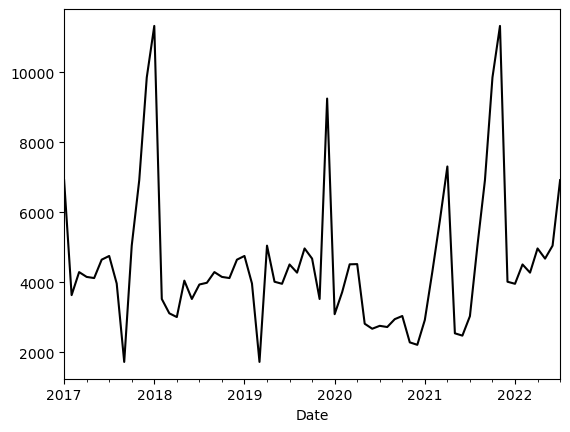

In [34]:
a['pizza'].plot(color='k')

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
adfuller(a['pizza'])

(-5.036346949349124,
 1.8796334325786566e-05,
 0,
 66,
 {'1%': -3.5335601309235605,
  '5%': -2.9064436883991434,
  '10%': -2.590723948576676},
 986.0280363374512)

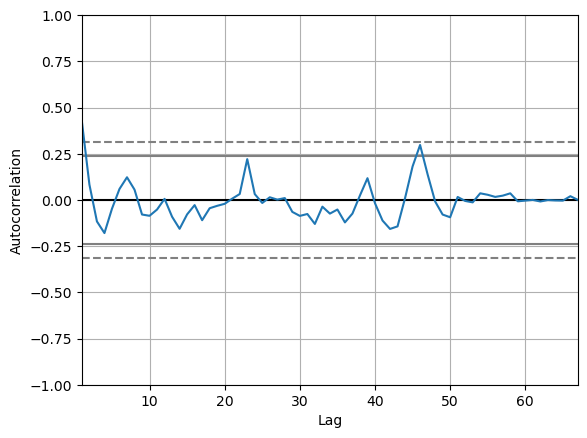

In [37]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(a['pizza'])
plt.show()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

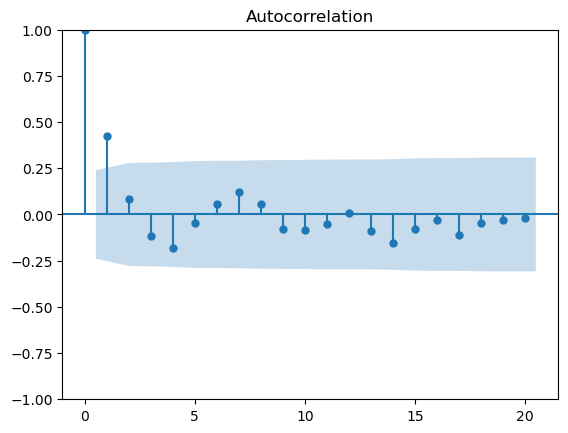

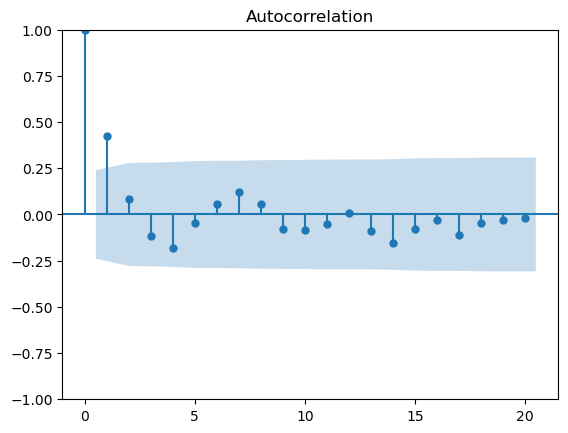

In [39]:
plot_acf(a['pizza'],lags=20)

D:\Python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


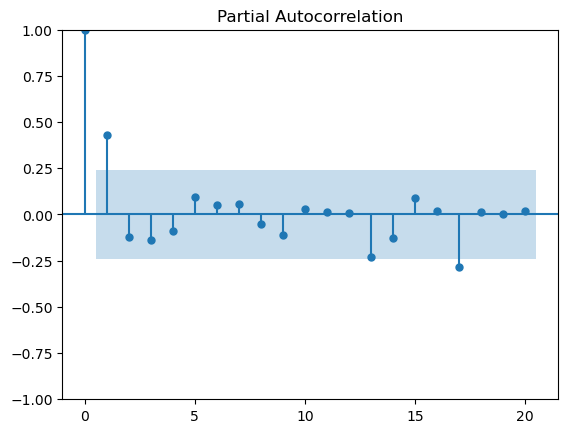

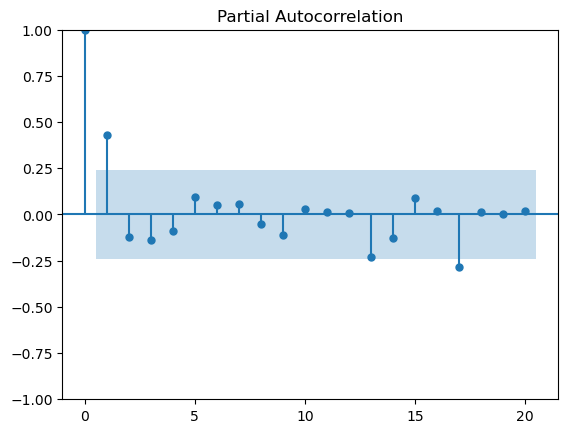

In [40]:
plot_pacf(a['pizza'],lags=20)

In [41]:
import statsmodels.api as sm


In [42]:
model=sm.tsa.statespace.SARIMAX(a['pizza'],order=(1,1,5),seasonal_order=(2,1,4,12))
result=model.fit()

D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
D:\Python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

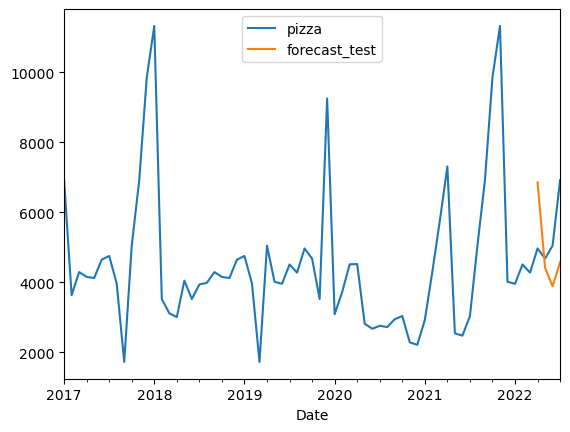

In [43]:
a['forecast_test']=result.predict(start='2022-04-01',end='2022-07-01',dynamic=True)
a[['pizza','forecast_test']].plot()

In [44]:
from pandas.tseries.offsets import DateOffset

In [45]:
future_date=[a.index[-1]+DateOffset(months=x)for x in range(0,48)]
fut=pd.DataFrame(index=future_date[1:],columns=a.columns)

In [46]:
future=pd.concat([a,fut])

In [47]:
future.head()

,pizza,forecast_test
2017-01-01,6922,NaN
2017-02-01,3633,NaN
2017-03-01,4292,NaN
2017-04-01,4154,NaN
2017-05-01,4121,NaN


<AxesSubplot:>

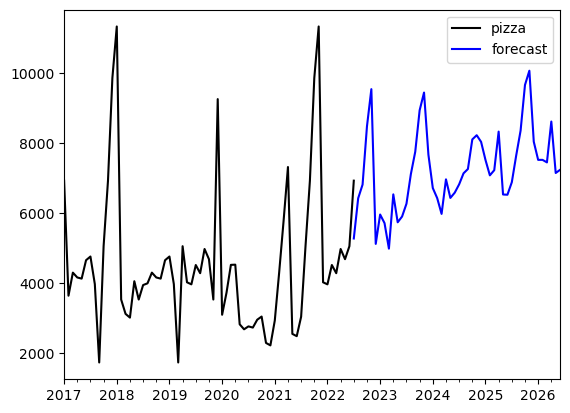

In [48]:
future['forecast']=result.predict(start='2022-07-01',end='2026-07-01',dynamic=True)
future[['pizza','forecast']].plot(color=['k','blue'])